In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt

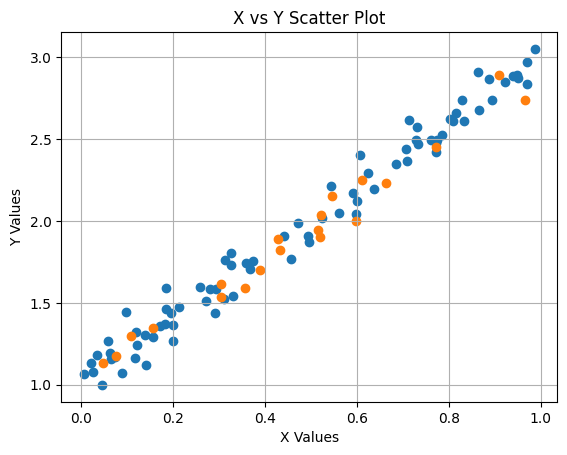

In [2]:
# synthetic data generation with fancy indexes using numpy
true_b = 1
true_w = 2
N = 100
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = 0.1 * np.random.randn(N, 1)

y = true_b + (true_w * x) + epsilon

# now let's separate the train and validation data
idx = np.arange(100)
np.random.shuffle(idx)
train_idx = idx[: int(0.8 * N)]
val_idx = idx[int(0.8 * N) :]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

#  now plotting the data
plt.scatter(x_train.flatten(), y_train.flatten(), marker="o")
plt.scatter(x_val.flatten(), y_val.flatten(), marker="o")
plt.title("X vs Y Scatter Plot")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(True)
plt.show()

[1.02354094] [1.96896411]


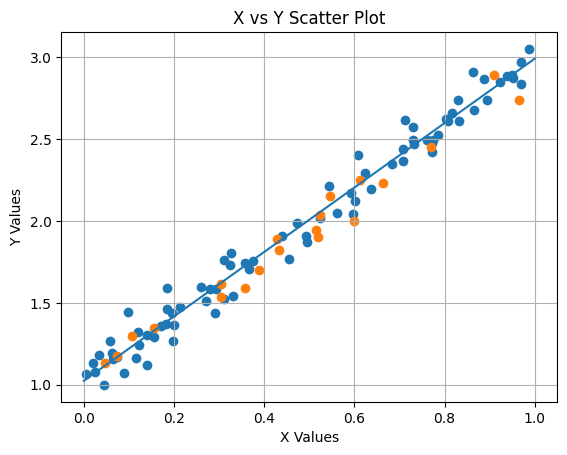

[1.02354075] [1.96896447]


In [3]:
# initialize b and w to random values
lr = 0.1
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
n_epoch = 1000

for epoch in range(n_epoch):
    # prediction and loss
    y_hat = b + w * x_train
    error = y_hat - y_train
    loss = (error**2).mean()
    # compute the partial derivatives of loss wrt b and w
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)

x_range = np.linspace(-0, 1, 100)
y_range = b + w * x_range

plt.scatter(x_train.flatten(), y_train.flatten(), marker="o")
plt.scatter(x_val.flatten(), y_val.flatten(), marker="o")
plt.plot(x_range, y_range)
plt.title("X vs Y Scatter Plot")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(True)
plt.show()

# checking if correct using scikit learn's linear regression function
linr = LinearRegression()
linr.fit(x_train, y_train)

print(linr.intercept_, linr.coef_[0])

In [4]:
# pytorch starting
scalar = torch.tensor(123)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.zeros((1, 2, 3), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

print(matrix.shape)

tensor(123)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 3])


In [5]:
matrix = torch.randn((2,3), dtype=torch.float32)
matrix2 = matrix
matrix2[0,1] = 200
matrix3 = matrix.clone().detach()
matrix[0,1] = 300
print(matrix, matrix2, matrix3)

x_train_tensor = torch.as_tensor(x_train)
x_train_tensor.dtype

tensor([[-8.0329e-01,  3.0000e+02,  2.0216e-01],
        [ 9.7635e-01, -1.1993e+00, -6.9731e-03]]) tensor([[-8.0329e-01,  3.0000e+02,  2.0216e-01],
        [ 9.7635e-01, -1.1993e+00, -6.9731e-03]]) tensor([[-8.0329e-01,  2.0000e+02,  2.0216e-01],
        [ 9.7635e-01, -1.1993e+00, -6.9731e-03]])


torch.float64

tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)


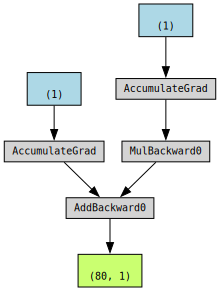

In [ ]:
# # gpu related code
# torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 0.1
# x_train_tensor = torch.as_tensor(x_train).float().to(device)
# y_train_tensor = torch.as_tensor(y_train).float().to(device)

# # different way of initializing params
# # w = torch.randn(1, dtype=torch.float).to(device)
# # w.requires_grad_()

# b = torch.randn(1, dtype=torch.float, device=device, requires_grad=True)
# w = torch.randn(1, dtype=torch.float, device=device, requires_grad=True)
# y_hat = b + w * x_train_tensor
# error = y_hat - y_train_tensor
# loss = (error**2).mean()
# # this will compute gradients for the b, w, error and y_hat because they are all gradient requiring
# loss.backward()

# print(w.grad, b.grad)
# b.grad.zero_()
# w.grad.zero_()

torch.manual_seed(42)

b = torch.randn(1, requires_grad=True, device=device, dtype=torch.float)
w = torch.randn(1, requires_grad=True, device=device, dtype=torch.float)

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)
y_hat = b + w * x_train_tensor
error = y_hat - y_train_tensor
loss = (error**2).mean()

loss.backward()

with torch.no_grad():
    b -= lr * b.grad
    w -= lr * w.grad

b.grad.zero_()
w.grad.zero_()

print(b, w)
make_dot(y_hat)

In [7]:
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
loss_fn = nn.MSELoss(reduction="mean")
n_epoch = 1000
lr = 0.01
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

for epoch in range(n_epoch):
    y_hat = b + w * x_train_tensor
    # error = y_hat - y_train_tensor
    # loss = (error**2).mean()
    loss = loss_fn(y_hat, y_train_tensor)
    # item and tolist are same. tolist is for multiple elements, item is for single. They return scalar
    # print(loss.tolist())
    # print(loss.item())
    loss.backward()
    optimizer = optim.SGD([b, w], lr=lr)
    optimizer.step()
    optimizer.zero_grad()

print(b, w)
loss_fn

tensor([1.1914], device='cuda:0', requires_grad=True) tensor([1.6406], device='cuda:0', requires_grad=True)


MSELoss()

In [8]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.b = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        )
        self.w = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        )

    def forward(self, x):
        return self.b + self.w * x


model = ManualLinearRegression().to(device)
print(list(model.parameters()))
print(model.state_dict())
print(optimizer.state_dict())

loss_fn = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(1000):
    model.train()
    y_hat = model(x_train_tensor)
    loss = loss_fn(y_hat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print("$$$$$$$$$$$$$$$")
print(model.state_dict())

[Parameter containing:
tensor([-1.2682], device='cuda:0', requires_grad=True), Parameter containing:
tensor([1.4640], device='cuda:0', requires_grad=True)]
OrderedDict({'b': tensor([-1.2682], device='cuda:0'), 'w': tensor([1.4640], device='cuda:0')})
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}
$$$$$$$$$$$$$$$
OrderedDict({'b': tensor([0.9640], device='cuda:0'), 'w': tensor([2.0854], device='cuda:0')})


In [9]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression().to(device)
lr = 0.1
loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)
optimimzer = optim.Adam(model.parameters(), lr=lr)
n_epoch = 1000

for epoch in range(n_epoch):
    model.train()
    predictions = model(x_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

# tfllsz = train, forward pass, loss calculate, loss backward, step, zero_grad
# trying with sequential
# model = nn.Sequential(nn.Linear(1,1)).to(device)
# model1 = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)
model1 = nn.Sequential()
model1.add_module("layer1", nn.Linear(3, 5))
model1.add_module("layer2", nn.Linear(5, 1))
model1.to(device)
model1

OrderedDict({'linear.weight': tensor([[0.7645]], device='cuda:0'), 'linear.bias': tensor([0.8300], device='cuda:0')})


Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)